## STUDENT PROJECT
## TITLE: "Determining the porosity of the cement paste using deep learning architecture"

**Marika Eik**

**26.11.2020**

**INTRODUCTION**

The porosity of the cement paste is important property defining the durability, shrinkage and strength of the final material. Common and oftenly used direct methods defining the porosity of the cement paste are mercury or water intrusion porosimetries. However, these methods have limitations of obtaining accurate porosity values.
On top of that, by using these methods it is possible to measure only the porosity of the bulk cement paste. 
Essentially, the distribution of porosity of the cement paste is heterogeneous, meaning that, for example, the porosity of the cement paste close to the inclusion surface, such as aggregate or fibre, differs from the one in the bulk material. 
The effect of inclusion on a cementitious matrix depends on the interaction between them. This interaction affects the formation of the micro-structure and mineralogical composition of the cement paste around the inclusion surface by creating a boundary zone, called the interfacial transition zone (ITZ). Usually, the porosity of the cement paste within the transition zone is higher due to the "wall" effect created by the fibre and inefficient packing of the cement grains close to the fibre surface during the setting. The porosity of the boundary zone is of high importance, since it determines the permiability, durability, shrinkage and strength of the final  composite.

The porosity of the cement paste can also be defined using the image analysis. As for example, in the study by <a href='https://doi.org/10.1016/j.cemconcomp.2020.103800'> Eik et al.</a>, where the pores and unhydrated cement grains were identified from the cement paste by separating them from computed tomography images using thresholding method. In this study the images received by micro-computed tomography combined with the phase contrast imaging were used. The principle difference of phase contrast tomography from a conventional transmission X-ray imaging is the use of X-ray wave to detect the phase shift, i.e. change in the propagation direction of a wave-front. The phase shift is proportional to material density and occurs at the edges of particles or pores, where material has different index of refraction. The magnitude of the X-ray phase shift is sufficiently large even if the absorption cannot be detected. The sensitivity of phase contrast tomography allows to study the materials consisting of various components with small differences in their densities, such as the cement paste.

## Problem Formulation

**Determine the porosity of the cement paste using the grayscale images received by micro-computed tomography (mCT) combined with phase contrast imaging.**

Essentially, it is difficult to obtain tomography images with a resolution smaller than 1 μm from the cementitious composite samples with reasonable dimensions, especially utilising CT devices typically available in research laboratories. In the study by <a href='https://doi.org/10.1016/j.cemconcomp.2020.103800'> Eik et al.</a>, the authors utilised high resolution three-dimensional images received by combining the mCT with phase contrast tomography to measure the porosity of the cement paste volumes equal to 1.305×1.305×1.305 mm3. The  resolution of  CT images obtained was 0.637 μm,  which allowed to analyse large capillaries and interfacial pores around the polypropylene fibres. In the study, the authors found that the changes in relative amounts of pores and unhydrated particles indicated that the boundary zone extended to a distance of 70 μm from the fibre surface. 

In present project, these mCT images were used to generate the individual data points. The porosity values of the cement paste, measured in the study <a href='https://doi.org/10.1016/j.cemconcomp.2020.103800'> Eik et al.</a> by the thresholding method, were used as the labels.

The data points for this project were generated so that two patches were cut from the image of one slice/section of a sample. Each sample had 2046 slices and altogether there were 3 samples. The choice of two patches was motivated by the presence of the boundary zone, where the porosity was about twice or even four times higher than in the bulk cement paste. Thus, one patch was selected close to the fibre surface, i.e. between the distance from 0-70 μm from the fibre surface, and the second patch was chosen between the distance from 70 to 140 μm from the fibre surface.

The representation of extracted image patches from the slice/section of a sample and the corresponding labels--measured porosity values, are represented in the Figure below. The dimensions of one extracted image patch were: 112x400 px. 

<img src="dataset_label_notordinal.svg">

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

import numpy as np
import pathlib
import datetime

from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Splitting the data into train, validation and test sets

**The data was split, such as follows:**

* Total number of images: 12 276;
* Test data set: 1860 (about 15% from the total number of images);
* Training/validation data sets: split 80/20, i.e. training set: 8328, validation set: 2088.

In [3]:
# TRAINING DATA DIRECTORY
dir_train = pathlib.Path("labelling/data/train/")
image_count_train = len(list(dir_train.glob('*/*.jpg')))
print('The number of training images:', image_count_train)

# VALIDATION DATA DIRECTORY
dir_val = pathlib.Path("labelling/data/valid/")
image_count_val = len(list(dir_val.glob('*/*.jpg')))
print('The number of validation images:', image_count_val)

# TEST DATA DIRECTORY
dir_test = pathlib.Path("labelling/data/test/")
image_count_test = len(list(dir_test.glob('*/*.jpg')))
print('The number of test images:', image_count_test)

The number of training images: 8328
The number of validation images: 2088
The number of test images: 1860


In [4]:
CLASS_NAMES = np.array([item.name for item in dir_train.glob('*') ])

num_classes={} 
for i, cl_name in enumerate(CLASS_NAMES):
    num_classes[cl_name] = i
print('Class names with the corresponding label:', num_classes)

output_class_units = len(CLASS_NAMES)
print('The total number of classes:', output_class_units)

Class names with the corresponding label: {'2.34': 0, '8.3': 1, '5.45': 2, '4.6': 3, '20.1': 4, '4.76': 5}
The total number of classes: 6


In [4]:
#ordinal_class={'2.34': 1, '4.6': 2, '4.76': 3, '5.45': 4, '8.3': 5, '20.1': 6}

By using the class_mode='categorical' the labels are converted to one-hot encoded vectors. By using the 
'classes = list(CLASS_NAMES)' or 'classes={'2.34': 1, '4.6': 2, '4.76': 3, '5.45': 4, '8.3': 5, '20.1': 6}' makes the one-hot vectors in specific order.

In [5]:
# Rescalingthe pixel values from 0~255 to 0~1 For RGB Channels of the image.
# import ImageDataGenerator class
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen_train=ImageDataGenerator(rescale=1./255)


train = image_gen_train.flow_from_directory(directory=str(dir_train), 
                                                     batch_size=32,
                                                     shuffle=True,
                                                     target_size=(112,400), 
                                                     classes = list(CLASS_NAMES) 
                                                     #class_mode='categorical'
                                                     )

Found 8328 images belonging to 6 classes.


In [6]:
# Rescalingthe pixel values from 0~255 to 0~1 For RGB Channels of the image.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen_valid = ImageDataGenerator(rescale=1./255)

valid = image_gen_valid.flow_from_directory(directory=str(dir_val), 
                                                     batch_size=32,
                                                     shuffle=True,
                                                     target_size=(112,400), 
                                                     classes = list(CLASS_NAMES)
                                                     )

Found 2088 images belonging to 6 classes.


In [7]:
print("Image Size of first image in training set: ",train[0][0][0].shape)
print("Image Size of first image in validation set: ",valid[65][0][0].shape)

Image Size of first image in training set:  (112, 400, 3)
Image Size of first image in validation set:  (112, 400, 3)


In [8]:
# retrieve first values
train_batch1, label_batch1 = next(train)

valid_batch1, label_batch1_val = next(valid)

# display numpay arrays shape
print(train_batch1.shape, label_batch1.shape)
print(valid_batch1.shape, label_batch1_val.shape)

(32, 112, 400, 3) (32, 6)
(32, 112, 400, 3) (32, 6)


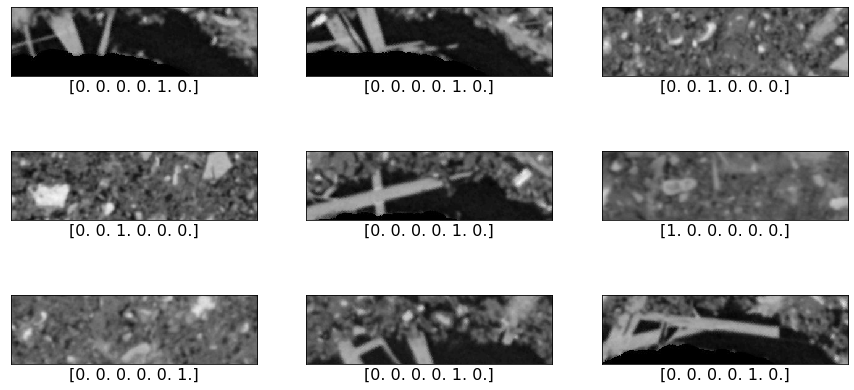

Class names with the corresponding label: {'2.34': 0, '8.3': 1, '5.45': 2, '4.6': 3, '20.1': 4, '4.76': 5}
['2.34', '8.3', '5.45', '4.6', '20.1', '4.76']


In [10]:
fig = plt.figure(1,figsize=(15,7.5))

# plot first 9 images from the training dataset
for i in range(9):
    # create an empty subplot
    plt.subplot(3,3,i+1)
    # read the image file 
    image = plt.imshow(train_batch1[i])
    
    # format axes 
    plt.xticks([])  # remove x axis ticks       
    plt.yticks([])  # remove y axis ticks
    
    label = label_batch1[i]
    plt.xlabel(label, fontsize = 16)
    
plt.show()

print('Class names with the corresponding label:', num_classes)
print(list(CLASS_NAMES))

**DEFINING THE MODEL_Round3**

As a first try, it was decided to observe how the model can generally learn the porosity of the cement paste by extracted image patches using the less deep, simple and verified model architecture utilised in the Deep Learning course in Round_3. The architecture of the ANN can be seen below.

In [11]:
# define the model architecture
model = tf.keras.models.Sequential([
    # input + 1st(Conv → Conv → Pool) block
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[112, 400, 3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    # 2nd(Conv → Conv → Pool) block
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    # Flatten 
    tf.keras.layers.Flatten(),
    # 1st Dense layer
    tf.keras.layers.Dense(128, activation="relu"),
    # 2nd Dense (output) layer
    tf.keras.layers.Dense(output_class_units, activation="softmax")
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 400, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 400, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 200, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 200, 64)       18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 200, 64)       36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 100, 64)       0         
_________________________________________________________________
flatten (Flatten)            (None, 179200)            0

**The optimizers are a crucial part of the neural network. Understanding how they work would help to choose which one to use for the considered application.**

Two optimisers were tested in this project:

* SGD (Stochastic Gradient descent (with momentum));
* RMSprop (Root Mean Square Propagation).

Gradient descent (GD) is the most popular and widely used out of all optimizers. The objective of all optimizers is to reach the global minima, where the cost function attains the least possible value. The loss function is a part of the cost function, which is calculated as an average of loss functions, and the loss function is a value, which is calculated for a single training set. Often, the cost function appears to be non-convex. The risk with the non-convex finctions is that the algorithm may get stuck in a local minima, meaning that the loss may never converge to the global minima. Learning rate is probably the most important aspect of gradient descent and also other optimizers, which may minimise the risk to converge into local minima. 

Often, GD with momentum converges faster than the standard GD algorithm. In the standard GD algorithm,  the larger steps are taken in one direction and smaller steps in another direction, which slows down the algorithm. If the algorithm is able to reduce the steps taken in the, e.g. Y-direction and concentrate the direction of the step in the X-direction, the algorithm would converge faster. This is what GD with momentum does, it restricts the oscillation in one direction so that the algorithm can converge faster. The RMSprop optimizer is similar to the GD algorithm with momentum. It restricts the oscillations in the vertical direction, which enables to increase the learning rate, meaning that the algorithm can take larger steps in the horisontal direction and converge faster. 
 
* For the loss function, the "Categorical_Crossentropy" was used, since the labelling of the data points was done by one-hot representation. In case the labels are provided as integers, the "Sparse_Categorical_Crossentropy" should be used.

* For the accuracy, the "Accuracy" metrics was selected. It calculates how often the predictions equal to the true labels, i.e. the portion of correct guesses. This metric creates two local variables, total and count that are used to compute the **frequency** with which y_pred matches y_true. 

In [13]:
# compile the model 
from tensorflow.keras import optimizers

#model.compile(optimizer='sgd', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=2e-5), loss="categorical_crossentropy", metrics=['accuracy'])
#(lr=2e-5)

In [13]:
%%time 

# Training the Model
history = model.fit(
      train,
      epochs=50,
      validation_data=valid
      #callbacks=[tensorboard_callback,callbacks]
)

Epoch 1/50
261/261 [==============================] - 534s 2s/step - loss: 1.2458 - acc: 0.5578 - val_loss: 1.1754 - val_acc: 0.4899
Epoch 2/50
261/261 [==============================] - 514s 2s/step - loss: 0.6186 - acc: 0.8020 - val_loss: 0.9590 - val_acc: 0.4995
Epoch 3/50
261/261 [==============================] - 511s 2s/step - loss: 0.3808 - acc: 0.8846 - val_loss: 0.9528 - val_acc: 0.5177
Epoch 4/50
261/261 [==============================] - 511s 2s/step - loss: 0.2550 - acc: 0.9224 - val_loss: 1.0646 - val_acc: 0.5704
Epoch 5/50
261/261 [==============================] - 517s 2s/step - loss: 0.1674 - acc: 0.9549 - val_loss: 1.0251 - val_acc: 0.5785
Epoch 6/50
261/261 [==============================] - 524s 2s/step - loss: 0.1081 - acc: 0.9735 - val_loss: 1.1367 - val_acc: 0.6006
Epoch 7/50
261/261 [==============================] - 529s 2s/step - loss: 0.0696 - acc: 0.9831 - val_loss: 1.1596 - val_acc: 0.5886
Epoch 8/50
261/261 [==============================] - 529s 2s/step - 

In [14]:
filepath = './labelling/st_proj_notdeep_model/round3_model80'
tf.keras.models.save_model(model,filepath)

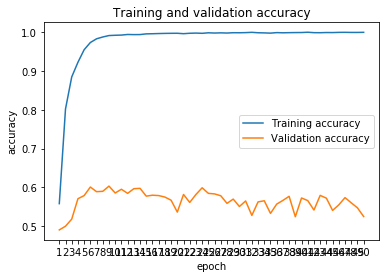

In [15]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc_key = 'acc'
acc      = history.history[acc_key]
val_acc  = history.history['val_'+acc_key]
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1,len(acc)+1) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.plot(epochs, val_acc,  label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

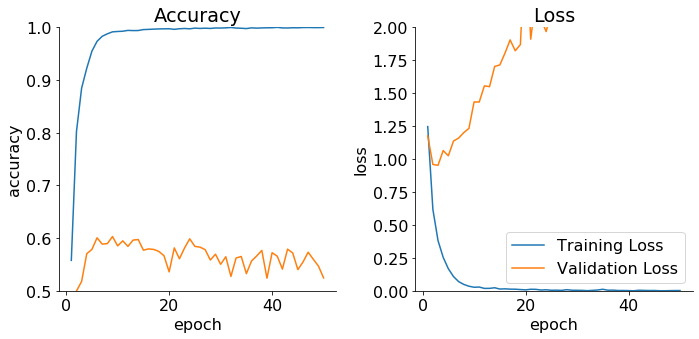

In [16]:
from plot_history import plot_history
plot_history(history)

**Result**

As it can be seen from the diagrams, the learning efficiency is low and the model is overfitting. The possible reasons for this behaviour can be: 
* insufficient number of data points, i.e. not enough data for the training;
* too high heterogeneity of the cement paste which is the phenomena of this composite material.

 ## ANN training with Data Augmentation: to overcome the problem of overfitting when training with small dataset 

In [14]:
# import ImageDataGenerator class
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,#starting from below is augmentation
                                   #rotation_range=25,
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,
                                   zoom_range=0.15,
                                   shear_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [15]:
# create generator function for training dataset
train_augm = train_datagen.flow_from_directory(directory=str(dir_train), 
                                                     batch_size=32,
                                                     shuffle=True,
                                                     target_size=(112,400), 
                                                     classes =list(CLASS_NAMES)
                                                     #class_mode='categorical'
                                                    )

Found 8328 images belonging to 6 classes.


In [16]:
# import ImageDataGenerator class
from tensorflow.keras.preprocessing.image import ImageDataGenerator

valid_datagen =ImageDataGenerator(rescale=1./255)

valid = valid_datagen.flow_from_directory(directory=str(dir_val), 
                                                     batch_size=32,
                                                     shuffle=True,
                                                     target_size=(112,400), 
                                                     classes = list(CLASS_NAMES)
                                                     #class_mode='categorical'
                                                     )

Found 2088 images belonging to 6 classes.


**AUGMENTED IMAGES**

In [17]:
# retrieve first values
train_batch1_aug, label_batch1_aug = next(train_augm)
valid_batch1, label_val_batch1 = next(valid)

# display numpay arrays shape
print(train_batch1_aug.shape, label_batch1_aug.shape)
print(valid_batch1.shape, label_val_batch1.shape)

(32, 112, 400, 3) (32, 6)
(32, 112, 400, 3) (32, 6)


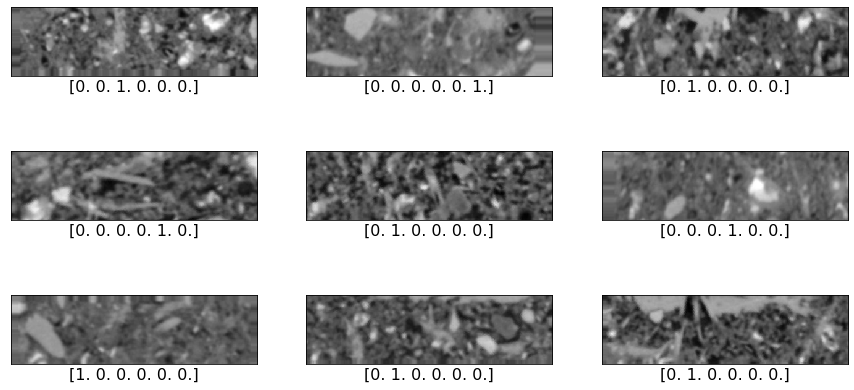

Class names with the corresponding label: {'2.34': 0, '8.3': 1, '5.45': 2, '4.6': 3, '20.1': 4, '4.76': 5}
['2.34', '8.3', '5.45', '4.6', '20.1', '4.76']


In [18]:
fig = plt.figure(1,figsize=(15,7.5))

for i in range(9):
    plt.subplot(3,3,i+1)
    image = plt.imshow(train_batch1_aug[i])

    plt.xticks([])  # remove x axis ticks       
    plt.yticks([])  # remove y axis ticks

    label = label_batch1_aug[i]
    plt.xlabel(label, fontsize = 16)
    
plt.show()

print('Class names with the corresponding label:', num_classes)
print(list(CLASS_NAMES))

In [19]:
# define the model architecture
model = tf.keras.models.Sequential([
    # input + 1st(Conv → Conv → Pool) block
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[112, 400, 3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    # 2nd(Conv → Conv → Pool) block
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    # Flatten 
    tf.keras.layers.Flatten(),
    # 1st Dense layer
    tf.keras.layers.Dense(128, activation="relu"),
    # 2nd Dense (output) layer
    tf.keras.layers.Dense(output_class_units, activation="softmax")
])

In [20]:
# compile the model 
from tensorflow.keras import optimizers

#model.compile(optimizer='sgd', loss="categorical_crossentropy", metrics=['accuracy'])
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=2e-5), loss="categorical_crossentropy", metrics=['accuracy'])
#(lr=2e-5)

In [13]:
%%time 

# Training the Model
history = model.fit(
      train_augm,
      epochs=50,
      validation_data=valid
      )

Epoch 1/50
261/261 [==============================] - 484s 2s/step - loss: 1.4703 - acc: 0.4343 - val_loss: 1.2822 - val_acc: 0.4330
Epoch 2/50
261/261 [==============================] - 498s 2s/step - loss: 0.9810 - acc: 0.6148 - val_loss: 0.9261 - val_acc: 0.6207
Epoch 3/50
261/261 [==============================] - 501s 2s/step - loss: 0.7584 - acc: 0.6844 - val_loss: 0.8176 - val_acc: 0.6049
Epoch 4/50
261/261 [==============================] - 501s 2s/step - loss: 0.6471 - acc: 0.7082 - val_loss: 0.7169 - val_acc: 0.6317
Epoch 5/50
261/261 [==============================] - 506s 2s/step - loss: 0.5746 - acc: 0.7519 - val_loss: 0.7212 - val_acc: 0.6533
Epoch 6/50
261/261 [==============================] - 508s 2s/step - loss: 0.5239 - acc: 0.7741 - val_loss: 0.6464 - val_acc: 0.6810
Epoch 7/50
261/261 [==============================] - 508s 2s/step - loss: 0.4705 - acc: 0.8093 - val_loss: 0.6677 - val_acc: 0.6849
Epoch 8/50
261/261 [==============================] - 507s 2s/step - 

In [14]:
filepath = './labelling/st_proj_notdeep_model/round3_model_augm80'
tf.keras.models.save_model(model,filepath)

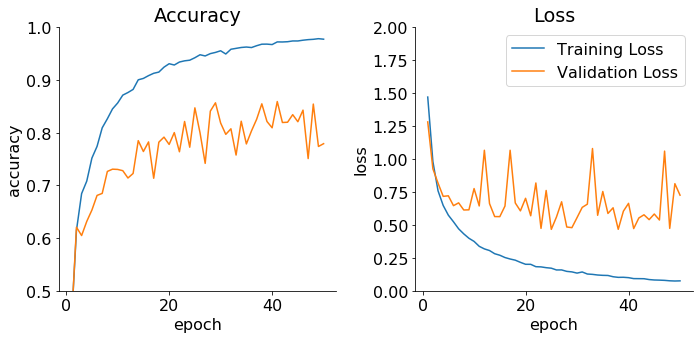

In [15]:
from plot_history import plot_history
plot_history(history)

**Result:**
Based on the Figures above, it can be seen that the performance of the training has improved with the augmentation of the training data. However, the overfitting is still present.

## Model training on augmented training data using the ALexNet architecture 
As an alternative to less deep, simple and verified model taken from the Round_3, the AlexNet model was also tested for the learning. The use of the AlexNet for the present project was motivated by the study reported in 
<a href='https://ascelibrary.org/doi/10.1061/%28ASCE%29CP.1943-5487.0000837'> Estimating Compressive Strength of Concrete Using Deep Convolutional Neural Networks with Digital Microscope Images.</a>

The AlexNet is a deep neural network, which is using the Batch Normalisation and the dropouts. It is assumed that Batch Normalisation may reduce the overfitting, since it has a slight regularisation effects. It works so that it normalises the output of a previous activation layer by subtracting the batch mean and dividing by the batch standard deviation. However, after this scale of activation outputs, the weights in the next layer are no longer optimal. Stochastic gradient descent regulates this normalisation, if it is a way for it to minimise the loss function. The droput is considered as the regularisation method, which randomly removes the neurons, thus forcing the learning process to learn the predictor maps that are robust against small perturbations.

The original paper giving the details of the AlexNet network architecture can be found here: 
<a href='//papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf'> ImageNet Classification with Deep Convolutional Neural Networks.</a>

Employing the AlexNet there is still a big chance that network will overfit, as we are training very large network on a small dataset.

In [21]:
# import ImageDataGenerator class
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create ImageDataGenerator object for training data
train_datagen = ImageDataGenerator(rescale = 1./255,#starting from below is augmentation
                                   #rotation_range=25,
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,
                                   zoom_range=0.15,
                                   shear_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [22]:
# create generator function for training dataset
train_augm_al = train_datagen.flow_from_directory(directory=str(dir_train), 
                                                     batch_size=64,
                                                     shuffle=True,
                                                     target_size=(227,227), 
                                                     classes = list(CLASS_NAMES)
                                                    )

Found 8328 images belonging to 6 classes.


In [23]:
# import ImageDataGenerator class
from tensorflow.keras.preprocessing.image import ImageDataGenerator

valid_datagen =ImageDataGenerator(rescale=1./255)

valid_al = valid_datagen.flow_from_directory(directory=str(dir_val), 
                                                     batch_size=64,
                                                     shuffle=True,
                                                     target_size=(227,227), 
                                                     classes = list(CLASS_NAMES)
                                                     #class_mode='categorical'
                                                     )

Found 2088 images belonging to 6 classes.


In [24]:
print("Image Size of first image in training set: ",train_augm_al[0][0][0].shape)
print("Image Size of first image in validation set: ",valid_al[32][0][0].shape)

Image Size of first image in training set:  (227, 227, 3)
Image Size of first image in validation set:  (227, 227, 3)


In [25]:
# retrieve first values
train_augm_al_batch1, label_batch1_aug_al = next(train_augm_al)

valid_al_batch1, label_batch1_val_al = next(valid_al)

# display numpay arrays shape
print(train_augm_al_batch1.shape, label_batch1_aug_al.shape)
print(valid_al_batch1.shape, label_batch1_val_al.shape)

(64, 227, 227, 3) (64, 6)
(64, 227, 227, 3) (64, 6)


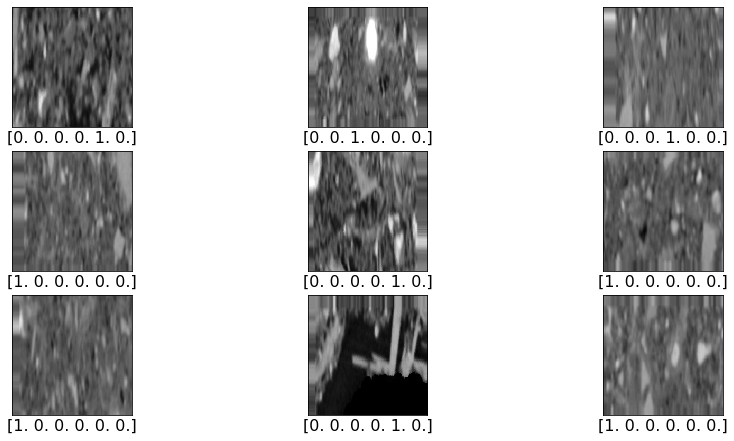

Class names with the corresponding label: {'2.34': 0, '8.3': 1, '5.45': 2, '4.6': 3, '20.1': 4, '4.76': 5}
['2.34', '8.3', '5.45', '4.6', '20.1', '4.76']


In [26]:
fig = plt.figure(1,figsize=(15,7.5))

for i in range(9):
    plt.subplot(3,3,i+1)
    image = plt.imshow(train_augm_al_batch1[i])
    
    plt.xticks([])  # remove x axis ticks       
    plt.yticks([])  # remove y axis ticks
    
    label = label_batch1_aug_al[i]
    plt.xlabel(label, fontsize = 16)
    
plt.show()

print('Class names with the corresponding label:', num_classes)
print(list(CLASS_NAMES))

During the first training of the AlexNet model, the CNN block was tested in its original architecture and in the flattening layers the dropouts were switched off. The model received with this configuration was overfitting.

Thus, it was decided to reduce the depths of the first two convolution layers by 2x and switch on the dropouts. These modifications were assumed to improve the model by decresing the overfitting. 
The Figure below demonstrates the architecture that was used for the training.

<img src="alexnet.svg">

In [27]:
 model_alnet = keras.models.Sequential([
    # 1st conv
    #keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.Conv2D(filters=48, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    # 2nd conv
    #keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    # 3rd conv
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
     # 4th conv
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
     # 5th Conv
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
     # To Flatten layer
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(output_class_units, activation='softmax')
    ])

In [28]:
## tf.keras.utils.plot_model(
#    model_alnet,
#    to_file='model_alnet.png',show_shapes=True, show_layer_names=True)
model_alnet.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 55, 55, 48)        17472     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 48)        192       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 27, 27, 128)       153728    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 128)       512       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 384)      

In [29]:
# compile the model 
from tensorflow.keras import optimizers

#model_alnet.compile(optimizer='sgd', loss="categorical_crossentropy", metrics=['accuracy'])
model_alnet.compile(optimizer=tf.keras.optimizers.RMSprop(lr=2e-5), loss="categorical_crossentropy", metrics=['accuracy'])
#(lr=2e-5)

In [14]:
%%time 

# Training the Model
history = model_alnet.fit(
      train_augm_al,
      epochs=50,
      validation_data=valid_al
      )

Epoch 1/50
131/131 [==============================] - 225s 2s/step - loss: 1.0860 - acc: 0.6691 - val_loss: 4.3806 - val_acc: 0.1667
Epoch 2/50
131/131 [==============================] - 229s 2s/step - loss: 0.4678 - acc: 0.8327 - val_loss: 9.3160 - val_acc: 0.1667
Epoch 3/50
131/131 [==============================] - 232s 2s/step - loss: 0.3440 - acc: 0.8774 - val_loss: 9.6368 - val_acc: 0.1772
Epoch 4/50
131/131 [==============================] - 234s 2s/step - loss: 0.2488 - acc: 0.9128 - val_loss: 5.6044 - val_acc: 0.2256
Epoch 5/50
131/131 [==============================] - 235s 2s/step - loss: 0.1984 - acc: 0.9284 - val_loss: 1.1526 - val_acc: 0.7102
Epoch 6/50
131/131 [==============================] - 235s 2s/step - loss: 0.1567 - acc: 0.9468 - val_loss: 1.2172 - val_acc: 0.7610
Epoch 7/50
131/131 [==============================] - 234s 2s/step - loss: 0.1293 - acc: 0.9549 - val_loss: 1.2473 - val_acc: 0.7505
Epoch 8/50
131/131 [==============================] - 236s 2s/step - 

In [15]:
filepath = './labelling/st_proj_notdeep_model/alnet_ld+drop_augm'
tf.keras.models.save_model(model_alnet,filepath)

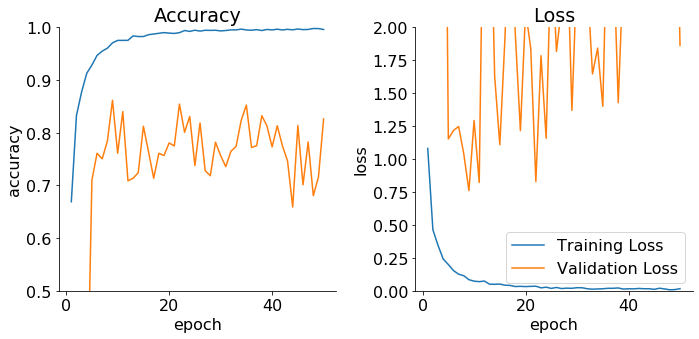

In [16]:
from plot_history import plot_history
plot_history(history)

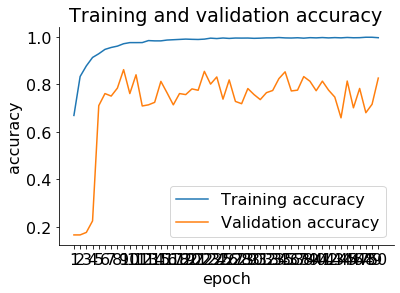

In [17]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc_key = 'acc'
acc      = history.history[acc_key]
val_acc  = history.history['val_'+acc_key]
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1,len(acc)+1) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.plot(epochs, val_acc,  label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

**Result:**

Based on the diagrams above, it can be seen that the learning accuracy is reasonable, although the model is still overfitting.
To improve the learning performance, the architecture of the model can be decreased and/or the image patches should be extracted from the mCT images being equal to the dimensions of the AlexNet input, i.e. 227 x 227 pixels. Such an assumption is related to the highly heterogeneous micro-structure of the cement paste, which becomes even more pronounced with the image scaling.

## Verifying the models trained (Round_3 and AlexNet) on the TEST data

In [31]:
filepath_1 = './labelling/st_proj_notdeep_model/round3_model_augm80'

model_r3_aug=tf.keras.models.load_model(filepath_1)
#model_r3_aug.summary()

In [33]:
filepath_2 = './labelling/st_proj_notdeep_model/alnet_ld+drop_augm'

model_aln_aug=tf.keras.models.load_model(filepath_2)
#model_aln_aug.summary()

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen_test=ImageDataGenerator(rescale=1./255)


test = image_gen_test.flow_from_directory(directory=str(dir_test), 
                                                     batch_size=32,
                                                     shuffle=False,#!!
                                                     target_size=(112,400), 
                                                     classes = list(CLASS_NAMES) 
                                                     )

Found 1860 images belonging to 6 classes.


In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen_test_aln=ImageDataGenerator(rescale=1./255)


test_aln = image_gen_test_aln.flow_from_directory(directory=str(dir_test), 
                                                     batch_size=64,
                                                     shuffle=False,#!!
                                                     target_size=(227,227), 
                                                     classes = list(CLASS_NAMES) 
                                                     )

Found 1860 images belonging to 6 classes.


**CHECKING the accuracy of MODEL_Round3_augm ON TEST DATA**

In [36]:
test_loss_r3, test_accuracy_r3 = model_r3_aug.evaluate(test)
print('Accuracy on test dataset by usin Round3 model:', test_accuracy_r3)

59/59 [==============================] - 21s 351ms/step - loss: 0.7205 - acc: 0.8005
Accuracy on test dataset by usin Round3 model: 0.80053765


**CHECKING the accuracy of MODEL_AlexNet_augm ON TEST DATA**

In [37]:
test_loss_aln, test_accuracy_aln = model_aln_aug.evaluate(test_aln)
print('Accuracy on test dataset by using the AlexNet model:', test_accuracy_aln)

30/30 [==============================] - 10s 339ms/step - loss: 2.0527 - acc: 0.7839
Accuracy on test dataset by using the AlexNet model: 0.783871


## Predicted classes on TEST data

**With the 'MODEL_Round3_augm'**

In [38]:
predicted_classes_r3  = np.argmax(model_r3_aug.predict(test), axis=-1)

print("Predicted classes on test data With the MODEL_round3_augm:",predicted_classes_r3)
print("Predicted porosities on test data With the MODEL_round3_augm:",CLASS_NAMES[predicted_classes_r3])

true_classes_r3 = test.classes
print("TRUE classes on TEST data:",true_classes_r3)

print('Class names with the corresponding label:', num_classes)

Predicted classes on test data With the MODEL_round3_augm: [5 2 3 ... 5 5 5]
Predicted porosities on test data With the MODEL_round3_augm: ['4.76' '5.45' '4.6' ... '4.76' '4.76' '4.76']
TRUE classes on TEST data: [0 0 0 ... 5 5 5]
Class names with the corresponding label: {'2.34': 0, '8.3': 1, '5.45': 2, '4.6': 3, '20.1': 4, '4.76': 5}


**With the 'MODEL_AlexNet_augm'**

In [39]:
predicted_classes_aln  = np.argmax(model_aln_aug.predict(test_aln), axis=-1)

print("Predicted classes on test data With the MODEL_AlexNet_augm:",predicted_classes_aln)
print("Predicted porosities on test data With the MODEL_AlexNet_augm:",CLASS_NAMES[predicted_classes_aln])

true_classes_aln = test_aln.classes
print("TRUE classes on TEST data:",true_classes_aln)

print('Class names with the corresponding label:', num_classes)

Predicted classes on test data With the MODEL_AlexNet_augm: [0 0 0 ... 5 5 5]
Predicted porosities on test data With the MODEL_AlexNet_augm: ['2.34' '2.34' '2.34' ... '4.76' '4.76' '4.76']
TRUE classes on TEST data: [0 0 0 ... 5 5 5]
Class names with the corresponding label: {'2.34': 0, '8.3': 1, '5.45': 2, '4.6': 3, '20.1': 4, '4.76': 5}


## Total correct and incorrect predictions

**With the 'MODEL_Round3_augm'**

In [40]:
correct_r3=np.nonzero(predicted_classes_r3==true_classes_r3)[0]

incorrect_r3=np.nonzero(predicted_classes_r3!=true_classes_r3)[0]

print("Correct predicted classes:",correct_r3.shape[0])
print("Incorrect predicted classes:",incorrect_r3.shape[0])
correct_r3.shape

Correct predicted classes: 1489
Incorrect predicted classes: 371


(1489,)

**With the 'MODEL_AlexNet_augm'**

In [41]:
correct_aln=np.nonzero(predicted_classes_aln==true_classes_aln)[0]

incorrect_aln=np.nonzero(predicted_classes_aln!=true_classes_aln)[0]

print("Correct predicted classes:",correct_aln.shape[0])
print("Incorrect predicted classes:",incorrect_aln.shape[0])

Correct predicted classes: 1458
Incorrect predicted classes: 402


## Visualizing the activation maps of  convolutional layers

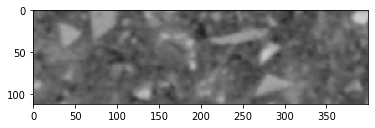

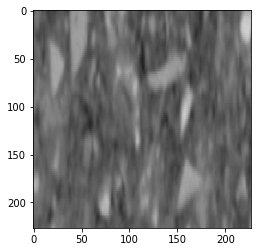

In [42]:
# display the image whose feature map we will visualize

test_batch1, test_label_batch1 = next(test)
plt.imshow(test_batch1[0], cmap='gray')
plt.show()

test_batch1_aln, test_label_batch1_aln = next(test_aln)
plt.imshow(test_batch1_aln[0], cmap='gray')
plt.show()

In [43]:
for layer in model_r3_aug.layers:
    print(layer)

In [44]:
for layer in model_aln_aug.layers:
    print(layer)

**Outputs of 'MODEL_Round3_augm'**

In [45]:
# extract the outputs from the layers:
layer_outputs_r3 = [layer.output for layer in model_r3_aug.layers]
print(len(layer_outputs_r3))
print(layer_outputs_r3[0])
print(layer_outputs_r3[1])
print(layer_outputs_r3[2])

9
Tensor("conv2d_4_2/Relu:0", shape=(?, 112, 400, 32), dtype=float32)
Tensor("conv2d_5_2/Relu:0", shape=(?, 112, 400, 32), dtype=float32)
Tensor("max_pooling2d_2_2/MaxPool:0", shape=(?, 56, 200, 32), dtype=float32)


**Outputs of 'MODEL_AlexNet_augm'**

In [46]:
# extract the outputs from the layers:
layer_outputs_aln = [layer.output for layer in model_aln_aug.layers]
print(len(layer_outputs_aln))
print(layer_outputs_aln[0])
print(layer_outputs_aln[1])
print(layer_outputs_aln[2])
print(layer_outputs_aln[3])
print(layer_outputs_aln[4])
print(layer_outputs_aln[5])
print(layer_outputs_aln[6])
print(layer_outputs_aln[7])
print(layer_outputs_aln[8])

19
Tensor("conv2d_5_4/Relu:0", shape=(?, 55, 55, 48), dtype=float32)
Tensor("batch_normalization_5_1/cond/Merge:0", shape=(?, 55, 55, 48), dtype=float32)
Tensor("max_pooling2d_3_4/MaxPool:0", shape=(?, 27, 27, 48), dtype=float32)
Tensor("conv2d_6_4/Relu:0", shape=(?, 27, 27, 128), dtype=float32)
Tensor("batch_normalization_6_1/cond/Merge:0", shape=(?, 27, 27, 128), dtype=float32)
Tensor("max_pooling2d_4_2/MaxPool:0", shape=(?, 13, 13, 128), dtype=float32)
Tensor("conv2d_7_4/Relu:0", shape=(?, 13, 13, 384), dtype=float32)
Tensor("batch_normalization_7_1/cond/Merge:0", shape=(?, 13, 13, 384), dtype=float32)
Tensor("conv2d_8_2/Relu:0", shape=(?, 13, 13, 384), dtype=float32)


In [47]:
model_r3_aug.input # input image

<tf.Tensor 'conv2d_4_input_2:0' shape=(?, 112, 400, 3) dtype=float32>

In [48]:
model_aln_aug.input # input image

<tf.Tensor 'conv2d_5_input_1:0' shape=(?, 227, 227, 3) dtype=float32>

In [49]:
# returning the outputs given the model input:
activation_model_r3 = tf.keras.models.Model(inputs = model_r3_aug.input, outputs = layer_outputs_r3)
activation_model_r3

In [50]:
activation_model_aln = tf.keras.models.Model(inputs = model_aln_aug.input, outputs = layer_outputs_aln)
activation_model_aln

In [51]:
# return feature maps of the first training image
activation_r3 = activation_model_r3.predict(test_batch1[0].reshape(1, 112, 400, 3))

In [52]:
len(activation_r3)

9

In [53]:
activation_aln = activation_model_aln.predict(test_batch1_aln[0].reshape(1, 227, 227, 3))

In [54]:
len(activation_aln)

19

## Activation maps of first convolution layer for the 'MODEL_Round3_augm'

In [55]:
first_layer_activation_r3 = activation_r3[0] 
print(first_layer_activation_r3.shape)
print(first_layer_activation_r3.shape[-1])

(1, 112, 400, 32)
32


The outputs of the first convolution layer are the activation maps of size $112 \times 400 \times 32$, having $32$ channels, which correspond to the different kernels applied to the input image. 

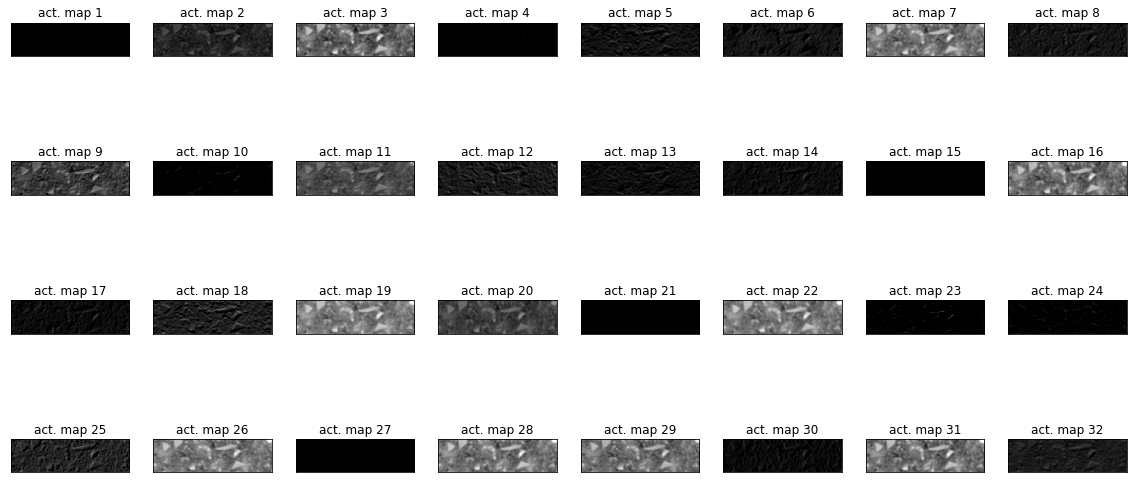

In [56]:
# visuale activation maps of the first convolutional layer
plt.figure(figsize=(20,20))

for i in range(first_layer_activation_r3.shape[-1]):
    plt.subplot(8,8,i+1)
    plt.xticks([]) # remove ticks on x-axis
    plt.yticks([]) # remove ticks on y-axis
    plt.imshow(first_layer_activation_r3[0, :, :, i], cmap='gray')
    plt.title('act. map '+ str(i+1))

plt.show()

## Activation maps of first convolution layer for the 'MODEL_AlexNet_augm'

In [57]:
first_layer_activation_aln = activation_aln[0]
print(first_layer_activation_aln.shape)
print(first_layer_activation_aln.shape[-1])

(1, 55, 55, 48)
48


The outputs of the first convolution layer are the activation maps of size $55 \times 55 \times 48$, having $48$ channels, which correspond to the different kernels applied to the input image. 

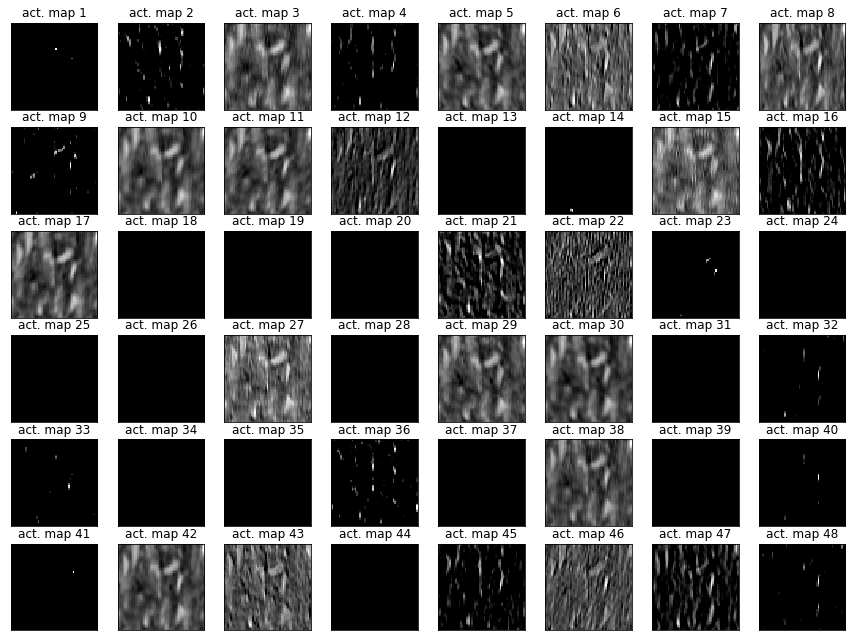

In [58]:
# visuale activation maps of the first convolutional layer
plt.figure(figsize=(15,15))

for i in range(first_layer_activation_aln.shape[-1]):
    plt.subplot(8,8,i+1)
    plt.xticks([]) # remove ticks on x-axis
    plt.yticks([]) # remove ticks on y-axis
    plt.imshow(first_layer_activation_aln[0, :, :, i], cmap='gray')
    plt.title('act. map '+ str(i+1))

plt.show()

**Result**:

* The activation maps of the first convolution layer produced by the 'MODEL_Round3_augm' did not demonstrate  special low-level features and in general the activation (feature) maps looked consistent and uniform.

* The activation maps of the first convolution layer produced by the 'MODEL_AlexNet_augm' well demonstrated various inherent low-level features.

## MODEL_Round3_augm performance: CLASSIFICATION REPORT

In [59]:
target_names = ["Class{}({}):".format(i,CLASS_NAMES[i]) for i in range(6)]
print(target_names)

print(classification_report(true_classes_r3, predicted_classes_r3, target_names=target_names))

['Class0(2.34):', 'Class1(8.3):', 'Class2(5.45):', 'Class3(4.6):', 'Class4(20.1):', 'Class5(4.76):']
               precision    recall  f1-score   support

Class0(2.34):       1.00      0.13      0.22       310
 Class1(8.3):       0.99      0.95      0.97       310
Class2(5.45):       0.85      0.92      0.88       310
 Class3(4.6):       0.50      0.93      0.65       310
Class4(20.1):       1.00      0.99      0.99       310
Class5(4.76):       0.90      0.89      0.90       310

     accuracy                           0.80      1860
    macro avg       0.87      0.80      0.77      1860
 weighted avg       0.87      0.80      0.77      1860



## MODEL_AlexNet_augm performance: CLASSIFICATION REPORT

In [60]:
target_names = ["Class{}({}):".format(i,CLASS_NAMES[i]) for i in range(6)]
print(target_names)

print(classification_report(true_classes_aln, predicted_classes_aln, target_names=target_names))

['Class0(2.34):', 'Class1(8.3):', 'Class2(5.45):', 'Class3(4.6):', 'Class4(20.1):', 'Class5(4.76):']
               precision    recall  f1-score   support

Class0(2.34):       0.67      0.73      0.70       310
 Class1(8.3):       1.00      0.66      0.79       310
Class2(5.45):       0.74      0.90      0.81       310
 Class3(4.6):       0.67      0.63      0.65       310
Class4(20.1):       0.82      1.00      0.90       310
Class5(4.76):       0.89      0.79      0.84       310

     accuracy                           0.78      1860
    macro avg       0.80      0.78      0.78      1860
 weighted avg       0.80      0.78      0.78      1860



**Visualisation of CORRECTLY classified images by MODEL_Round3_augm** 

In [61]:
import matplotlib.pyplot as plt

def plot_images(data_index):
    '''data_index: indices of images.'''
    f, ax = plt.subplots(4,4, figsize=(10,10))
       
    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(test_batch[i], cmap='gray')
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}Pred:{}".format(CLASS_NAMES[true_classes[indx]],CLASS_NAMES[predicted_classes[indx]]))
    plt.show()     

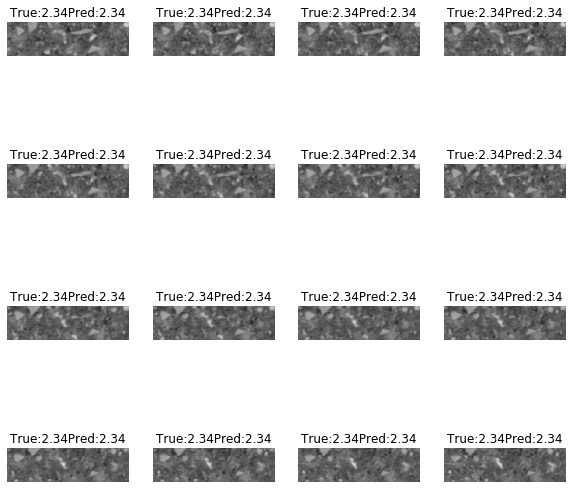

In [62]:
test_batch=test_batch1

true_classes=true_classes_r3
predicted_classes=predicted_classes_r3

plot_images(correct_r3)

**Visualisation of INCORRECTLY classified images by MODEL_AlexNet_augm**

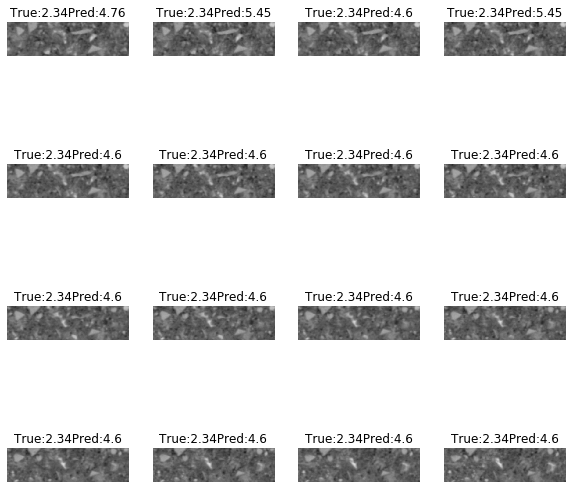

In [63]:
plot_images(incorrect_r3)

**Visualisation of CORRECTLY classified images by MODEL_AlexNet_augm** 

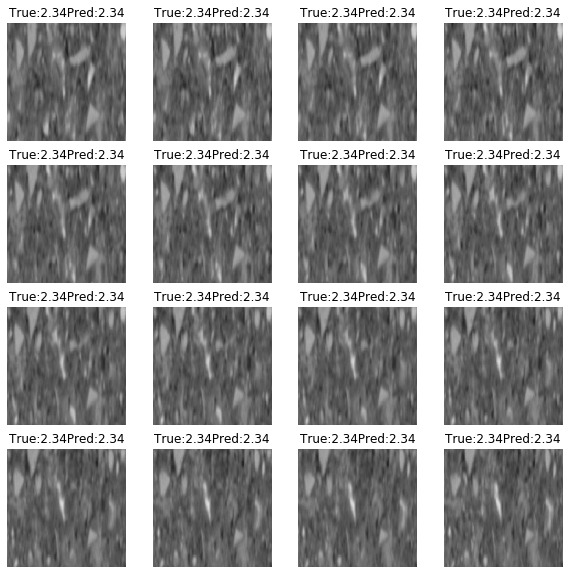

In [64]:
test_batch=test_batch1_aln

true_classes=true_classes_aln
predicted_classes=predicted_classes_aln

plot_images(correct_aln)

**Visualisation of INCORRECTLY classified images by MODEL_AlexNet_augm**

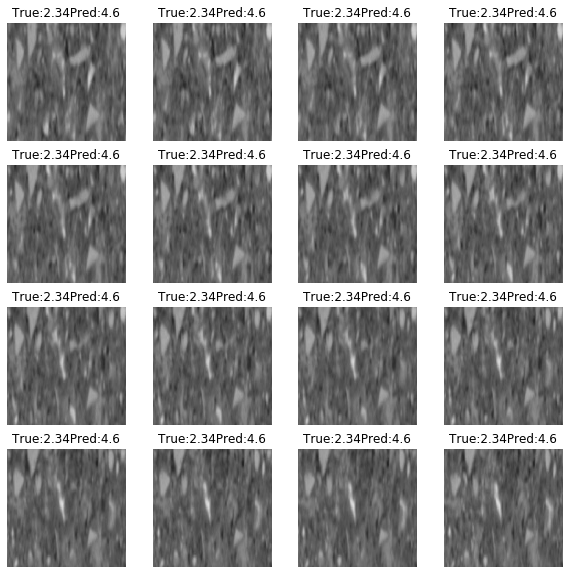

In [65]:
plot_images(incorrect_aln)

## Plotting the true and predicted labels of an image from Test data

In [68]:
def plot_image(i, true_labels, images, model_ap):
    
    ''' function to plot prediction result along with class probability
     arguments :
     i : image index
     true_labels : true class label of test set images
     images : test set images    
    '''   
    #img=(test_batch1[i])
    img=(images[i])
    model=model_ap
    #!Depending on model check for the INPUT.SHAPE (1,114,400,3)
    predictions_array=model.predict(img.reshape(1,227,227,3))#by applying the Softmax
    #there are 6 probabilities of belonging to the class
        
    true_label=true_labels[i]
    fig, (ax1,ax2) = plt.subplots(figsize=(9,12),ncols=2)
    ax1.grid(False)
    ax1.set_xticks([])
    ax1.set_yticks([])
  
    ax1.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)#we are choosing the max probability of belonging to the class
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    ax1.set_xlabel("Predicted : {} {:2.0f}% \n True label:({})".format(CLASS_NAMES[predicted_label],
                                100*np.max(predictions_array),
                                CLASS_NAMES[true_label]),
                                color=color)
 
    ax2.barh(np.arange(6), predictions_array.squeeze())# "6" is the number of CLASSES
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(6))
    ax2.set_yticklabels(CLASS_NAMES, size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

**Making the prediction by MODEL_Round3_augm**

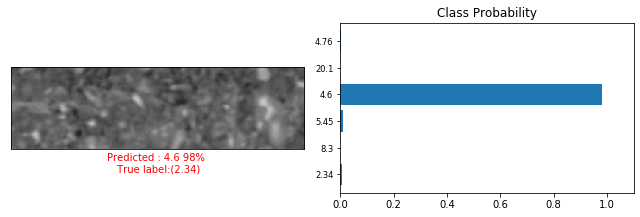

In [67]:
plot_image(25,true_classes_r3,test_batch1, model_r3_aug)

**Making the prediction by MODEL_AlexNet_augm**

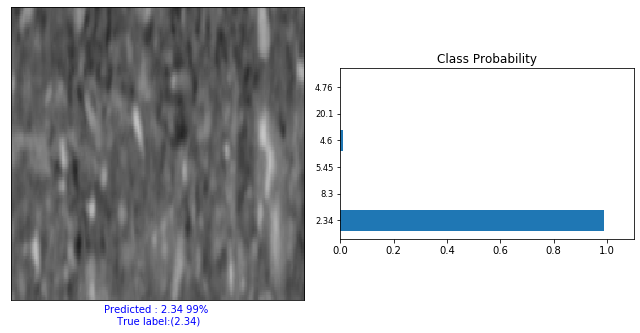

In [69]:
plot_image(25,true_classes_aln,test_batch1_aln, model_aln_aug)

**Result**

The above presented 'Class Probability' diagrams corresponding to an image[25] demonstrate that the models trained predict different results. It should be emphasised that due to the high heterogeneity of the cement paste, it is necessary to increase the number of data points so that the models can train more efficiently.

## Conclusions and future prospects

One of the relevant outcomes of the study was that the deepness of the networks used did not have a considerable effect on the learning performance of the models. The difficulty in learning was mostly related to the heterogeneous micro-structure of the cement paste. However, the activation maps of the first convolution layer received by the "Model_AlexNet_augm" better learned the low-level features, such as edges, intencities and shapes.

* the split of 80/20 of training/validation data sets had a better effect on the model training that the split of 70/30. During the training of the models, the split of 70/30 between the training and validation sets was also tested. It demonstrated a higher overfitting and a low learning performance, which can be observed in the Figure below.

 <img src="70_30notaug_round3.png">


* for the training, two optimisers were tested: 'sgd' and 'RMSprop' with the learning rate of lr=2e-5. It was noticed that 'RMSprop' gave more stable/less fluctuating distributions of the accuracies and the losses, while the application of the 'sgd' produced highly fluctuating distributions with several pronounced local peaks and valleys.

* due to the highly heterogeneous micro-structure of the cement paste, the larger number of the image patches extracted from the mCT slices is necessary.

* to improve/test the learning performance of the AlexNet model used, the image patches should be extracted from the mCT images being equal to the dimensions of the AlexNet input, i.e. 227 x 227 pixels. Such an assumption is related to the highly heterogeneous micro-structure of the cement paste, which becomes even more pronounced with the image scaling.

**Future prospect(s)**

* The values of porosities measured were changing from the low to high ones in ordinal sequence. This property can also be considered and implemented during the learning of the model, as the classification of the ordinal variables.

* Train the models with the larger number of the image patches, which is feasible.